# Pi Estimation

<center><img src="assets/unisquare.png" width=300 height=300 /></center>

## Using Area
Given a circle of radius $1/2$ inscribed in a unit square of side length 1. Estimate $\pi$ by throwing random darts at the square. The probability that a random dart thrown at the square will hit the circle is 
$$P_{\text{dart landing in circle}}=\frac{A_{\text{circle}}}{A_{\text{square}}}= \left( \frac{1}{2} \right)^2 \pi=\frac{\pi}{4}$$
So:
$$\hat{\pi}=4P_{\text{dart landing in circle}}=4\times\frac{{\text{Counts inside circle}}}{{\text{Total counts}}}$$

Algorithm:
- Generate 1000 random x and y coordinates in the range of 0 to 1.
- Determine if the points lie inside the circle when $d<R$
$$\sqrt{x^2+y^2}<R\Leftrightarrow x^2+y^2 < R^2$$
- Calculate the proportion of points inside the circle and the approximation of $\pi$ by multiplying the proportion by 4.

Estimated Pi = 3.024


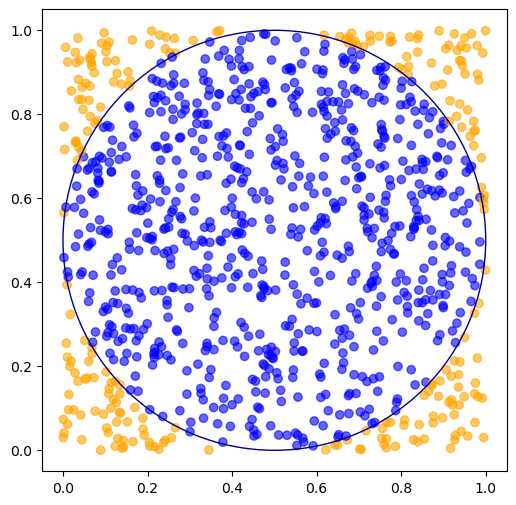

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random coordimates (x, y) uniformly from [0, 1)
points = np.random.uniform(0, 1, size=(1000, 2))
# Calculate distance
distance = np.square(points - 0.5).sum(axis=1)
# Count the number of points within the circle
is_inside_circle = distance < 0.5 ** 2
# Calculate pi
pi = np.sum(is_inside_circle) / len(points) * 4
print("Estimated Pi =", pi)

# Graph points
plt.figure(figsize=(6,6))
colors = np.where(is_inside_circle, 'blue', 'orange')
plt.scatter(points[:, 0], points[:, 1], c=colors, alpha=0.6)
circle = plt.Circle((0.5, 0.5), 0.5, color='darkblue', fill=False)
plt.gca().add_patch(circle)
plt.show()

Demonstrate estimated pi versus the number of darts

In [81]:
np.random.seed(2024)

def estimate_pi(n=10):
    # Generate random coordimates (x, y) uniformly from [0, 1)
    points = np.random.uniform(0, 1, size=(n, 2))
    # Calculate distance
    distance = np.square(points - 0.5).sum(axis=1)
    # Count the number of points within the circle
    is_inside_circle = distance < 0.5 ** 2
    # Calculate pi
    return np.sum(is_inside_circle) / len(points) * 4

pi_values = np.array([estimate_pi(i) for i in range(10, 10000)])
print("The average pi =", pi_values.mean())

The average pi = 3.141511048309607


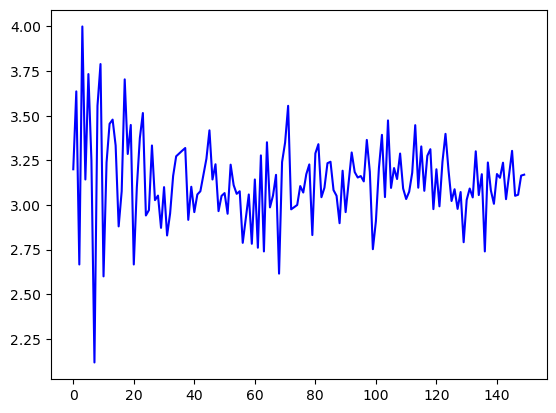

In [88]:
# Visulize the first 150 estimated values of pi
plt.plot(pi_values[0:150], color='blue');

## Using coordinates 
Suppose $U_1,U_2,...$ are iid $\text{Uni}(0,1)$. Then $(U_1,U_2)$ represents the random position of the dart on the unit square. The dart lands in the circle if
$$\left(U_1 -\frac{1}{2} \right)^2+\left(U_2 -\frac{1}{2} \right)^2 \le \frac{1}{4}$$

Generate $n$ such pairs of uniforms and count up how many of them fall in the circle. Then plug into $\hat{\pi}_n$
$$\hat{\pi}=4\times\frac{{\text{Counts inside circle}}}{{\text{Total counts}}}$$


In [11]:
n = 10000

# Define U1 and U2
U1 = np.random.uniform(0, 1, n)
U2 = np.random.uniform(0, 1, n)

distance = np.square(U1 - 0.5) + np.square(U2 - 0.5)
is_in_circle = (distance <= 0.25).sum()
pi = is_in_circle / n * 4
print("The estimated pi =", pi)

The estimated pi = 3.134
